<h2><center>Project Proposal</center></h2>

# Introduction

Fragrances are a unique product in that they are very personal and subjective, and yet they are also heavily marketed and advertised. Hence, ask a few people about their favourite perfume and most of them will reply with different answers. 

This piques my curiosity to explore the top selling scent families and their lesser known counterparts who share said scent family. 

I have chosen to tackle a large and ever-growing industry to identify unique scent families and research and analyse best selling perfumes to identify alternatives with the use of the latest data science techniques.

# Aim

By conducting this research, I hope to make a recommendation system based on the more well known perfumes and to gain insight into scent types available in the market.

The popularity of a perfume can be determined by a variety of factors, including rankings from websites, public opinion from Twitter or blogs, and individual opinions from these sources. Finding the top perfumes can be a difficult task, as there are so many different types and brands available, as well as the varying opinions related to perfumes.

Digital Magazines and Websites are a great starting point, as they often voice the public opinion from a generalised perspective. They often factor in the top selling perfumes, a good marking to have. Websites such as Fragrantica, Basenotes, and Perfume.com offer rankings of the top perfumes based on user reviews and ratings, which proves to be important from an individual perspective. These methods can be a great starting point for finding the most popular perfumes. Additionally, public opinion from Twitter or blogs can be a great way to gauge the popularity of a perfume with the msot updated and constant flow of information. By searching for the perfume name on Twitter or blogs, it is possible to get an idea of how people feel about the scent.

In conclusion, finding the top perfumes can be a difficult task, but by looking at rankings from websites, public opinion from Twitter or blogs, it is possible to determine which perfumes are the most popular. By taking all of these factors into consideration, I aim to make a recommendation system to help others make more informed choices when it comes to purchasing perfumes, and offer them alternatives to these best sellers.

# Objectives

The objectives of this tool are to be able to analyse inputs from various digital magazines and websites, to identify the top few perfumes mentioned. Following this, this perfume's description needs to be extracted and processed to identify strong keywords that define the corresponding fragrance. These keywords are then matched with a database of lesser known perfumes and their detailed descriptions, to find similar scents.

# Data

I have utilised five websites consisting of digital blogs and fashion magazines to use as my data set. 
- Women's Wear Daily
- Cosmopolitan
- Luxe Digital
- The Market Herald
- Marie Claire

These websites are popular in the field of perfumes and fragrances. To access the important data from these digital magazines, a web scraping tool was used that isolated Perfume names and descriptions based on the HTML structure of the website. These sources are well known, established and have high user traffic, hence the selection. As these sources focus primarily on women's beauty, health and fashion, their primary audience utilises such information on perfume and fragrances, resulting in a less biased or more geared to the masses review. The tool utilised was appropriate to scrape data from these websites in a uniform manner, due to the standardised website structure.

For other data sources, a website known as Fragrantica was the top choice, due to the high user traffic and updated database on perfumes, that coupled with large amounts of user reviews. However, the website policy prevented scraping and this data could not be used. Additionally, similar websites such as Perfume.com and basenotes do not match the user traffic and make less reliable sources, despite their extensive database.

# Project Background

This field is of interest to me due to the fact that the lack of relevant datasets showed it was a heavily under-researched problem, sdespite there being a large marketplace of it, with the large population having an interest in women's perfume. While this subject has been researched, it does not match the large database of perfumes that are being released, and such it does not meet the demand at the scale that it should.

The scope of work for this project would involve analysing online data to identify patterns preferences, and then using this data to develop a recommendation system. The steps and stages in the analytical data processing pipeline would include collecting  data, cleaning and pre-processing the data, developing a model to identify patterns in the data, and then using the model to generate recommendations.

# Limitations


When using five popular websites as a source of information, there are several limitations to consider. First, the information on these websites may not be reliable or accurate. Popular websites often contain user-generated content, which can be unreliable and biased. Additionally, the information may not be up-to-date or comprehensive. Popular websites may not contain the most recent information either..

Secondly, the information on popular websites may not be authoritative. Popular websites may not be written by experts in the field, and the information may not be verified or backed up by reliable sources. Additionally, the information may be incomplete or inaccurate

Thirdly, popular websites may contain inappropriate content or offensive or, which can be harmful to users. Additionally, popular websites may contain advertisements or links to other websites that may contain such content.

When it came to using the Twitter API, I have disregarded a very prominent problem; spam and advertisements. The key words that I have used pull spam tweets from bot accounts as well as advertisment from brands and stores. This results in data being slighlt unreliable.

Another limitation of my data set is that it does not consider the geograpical preferences of perfumes. Hence the results of may not be relevant in some parts of the world.


# Ethical use of data

I have used web scraping to scrape data from the following websites: Women's Wear Daily, Cosmopolitan, Luxe Digital, The Market Herald and Marie Claire.
All of these websites have clauses in them that allow their print to be  used for non-commerical use. Additionally I have checked the robot.txt file of all the websites and am successful in requesting data to be pulled.
As data is acumulated across multiple opinions and is only used if it's frequency shows it mentioned multiple time, this final data used is not determined on a singular opinion, hence this data is ethical to use. This does not open up any serious implications with it's purpose, as it is heavily tinged on opinionated descriptions. The data scraped from the internet was publicly available and does not need to be anonymised.

# Web Scraping

In [1]:
# Importing of relevant libraries for web scraping
import requests
import re
import bs4 
from bs4 import BeautifulSoup



In [2]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

What we are trying to find from web scraping is the list of top perfumes that is written on each website as well as its corresponding details such as scent type, family and description.

# Extracting data from Women's Wear Daily

In [3]:
# Extracting top 107 perfumes from WWD
url = 'https://wwd.com/beauty-industry-news/beauty-features/greatest-fragrances-1235061958/'

# Make a request to the website
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the strong p elements within the div element
wwd_perfume = soup.find('div', class_ = 'pmc-paywall').find_all('strong')

# Remove the <strong> and </strong> tags from the text using a list comprehension
new_string = [re.sub(r'<[/]?strong>', '', str(p)).replace("&amp;", "&")for p in wwd_perfume]

# Remove last element for relevancy
# List has 107 perfumes names 
wwd_reccomendations = new_string[:-1]

print(wwd_reccomendations)

# Extracting text content of each element
olfactive_family_elements = soup.find_all(text=lambda t: 'Olfactive Family' in t)

# List has 107 correspnding descriptions
wwd_scents = []

# Extract the text content of each element
for element in olfactive_family_elements:
    wwd_scents.append(element.get_text().replace('Olfactive Family: ', ''))

print(wwd_scents)

['Chanel No. 5 ', 'Le Labo Santal 33', 'Thierry Mugler Angel', 'Frédéric Malle Portrait of a Lady', 'Chanel Coco Mademoiselle', 'Dolce & Gabbana Light Blue', 'Dior Eau Sauvage', 'Tom Ford Black Orchid', 'Giorgio Armani Acqua di Giò', 'Calvin Klein CK One', 'Guerlain Shalimar', 'Issey Miyake L’Eau d’Issey', 'YSL Opium', 'Dior J’Adore', 'Estée Lauder Youth Dew', 'Clinique Aromatics Elixir', 'Maison Francis Kurkdjian Bacarrat Rouge', 'Frédéric Malle Carnal Flower', 'Narciso Rodriguez for Her', 'Viktor & Rolf Flowerbomb', 'Acqua di Parma', 'Colonia', 'Annick Goutal', 'Eau d’Hadrien', 'Aramis', 'Bath and Body Works Cherry Blossom', 'Bulgari', 'Eau Parfumée Au Thé Vert', 'Kilian Paris', 'Good Girl Gone Bad', 'Kilian Paris Love Don’t Be Shy', 'Byredo Gypsy Water', 'Byredo Mojave Ghost', 'Cacharel Anais Anais', 'Calvin Klein Eternity', 'Calvin Klein Obsession', 'Carolina Herrera Good Girl', 'Cartier Declaration', 'Chanel Bleu', 'Chanel Chance', 'Chanel Cristalle', 'Chanel No 19', 'Chloe', 'Cli

# Extracting data from Cosmopolitan

In [4]:
# Top 18 perfumes from Cosmopolitan
url = 'https://www.cosmopolitan.com/style-beauty/beauty/g26477382/best-perfumes/'

# Make a request to the website
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Scrape the perfume name from the website
cosmo_perfume = soup.find_all('span', class_ = 'listicle-slide-hed-text')

new_string_1 = [span.get_text() for span in cosmo_perfume]

# Remove last element for relevancy
# List has 18 perfumes names 
cosmopolitan_reccomendations = new_string_1[:-2]

print(cosmopolitan_reccomendations)

# Scrape the perfume description from the website
cosmo_perfume_scents = soup.find('div', class_ = 'listicle-body-content').find_all('p')

# Cleaning the text from scraped data
scent_descriptions = [scent.get_text() for scent in cosmo_perfume_scents]

# Remove last 6 indexes for relevancy
cosmo_scents = scent_descriptions[:-6]

# Each perfume in the reccommendations list has 3 lists in the corresponding cosmo scents lists
# Join every 3 elements in the list and store the result in a new list
# List has 18 perfumes descriptions
cosmopolitan_scents = [''.join(cosmo_scents[i:i+3]) for i in range(0, len(cosmo_scents), 3)]

# Print the result
print(cosmopolitan_scents)

['Ellis Brooklyn Sun Fruit Eau de Parfum', 'Prada Paradoxe Eau de Parfum', 'Huda Beauty Kayali Vanilla', 'Maison Margiela Replica Under the Lemon Trees', 'Chanel Coco Mademoiselle ', 'Tom Ford Oud Wood', 'Aerin Hibiscus Palm', 'Giorgio Armani Acqua Di Gioia ', 'Ariana Grande Cloud', 'Gucci Guilty Pour Femme', 'Viktor & Rolf Flowerbomb', 'Christian Dior Eden-Roc', 'Dolce & Gabbana Shine ', 'Giorgio Armani My Way Eau de Parfum', 'Yves Saint Laurent Black Opium Eau de Parfum', 'Jo Malone London Orange Blossom Cologne', 'Tiffany & Co. Tiffany & Love Eau de Parfum For Her', 'Floral Street Wonderland Peony Eau De Parfum']
['Fruity, citrusy, and all-around yummy, this bright fragrance from Ellis Brooklyn feels like a shot of happy energy each time you spritz it. At first, you’ll smell a sweet, light mix of pear, fig, and coconut, which will slowly mellow into a rich musk throughout the day. Truly one of my favorites for year-round wear.THE REVIEWS:“I absolutely love this perfume,” one tester 

# Extracting data from Luxe Digital

In [5]:
# 38 perfumes from luxe
url = 'https://luxe.digital/lifestyle/beauty/best-women-perfumes/'

# Make a request to the website
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Scrape the data from the website
luxe_perfume = soup.find('figure', class_ = 'wp-block-table').find_all('a')

#Extracting names from tags
new_string_2 = [tag.text for tag in luxe_perfume]

#Using regular expressions tp remove unwanted characters in string
# List has 38 perfumes
luxe_recommendations = [re.sub(r'\xa0', '', str(p)) for p in new_string_2]

print(luxe_recommendations)

#Extracting descriptions from tags
luxe_perfume_scents = soup.find_all('figure', class_ = 'wp-block-table preformatted')

luxe_scents = []

# Extracting table strings
for figure in luxe_perfume_scents:
    rows = figure.findChildren('tr')
    luxe_scents.append(rows[2].findChildren('td')[1].string)

# Using regular expression to remove unwanted characters
# List has 38 perfumes descriptions
luxe_scents = [re.sub(r'\xa0', '' , p)for p in luxe_scents]
print(luxe_scents)



['Viktor & Rolf', 'Tom Ford Black Orchid', 'Ariana Grande', 'Maison Francis Kurkdjian', 'Lancôme', 'Chanel Coco', 'YSL Black Opium', 'Gucci', 'Marc Jacobs', 'Vera Wang', 'Chanel N°5', 'Dior J’adore', 'Carine Roitfeld', 'Frederic Malle', 'Carolina Herrera', 'YSL Libre', 'Jimmy Choo', 'Dolce & Gabbana', 'Philosophy', 'Maison Margiela Replica', 'Miss Dior', 'Juliette Has a Gun', 'Chloé', 'Calvin Klein', 'Christian Louboutin', 'Jo Loves', 'Byredo Bal d’Afrique', 'Diptyque', 'Prada', 'Tom Ford Soleil', 'Le Labo', 'Byredo Mojave', 'Glossier', 'Jo Malone', 'Giorgio Armani', 'Aesop', 'Anine Bing', 'Anthropologie']
['Amber Floral', 'Amber Floral', 'Fruity Floral', 'Amber Floral', 'Floral Fruity Gourmand', 'Amber Floral', 'Amber Floral Gourmand', 'Floral', 'Floral Fruity', 'Floral', 'Amber Floral', 'Floral', 'Floral', 'Woody Aromatic', 'Amber Floral', 'Amber Floral', 'Chypre Fruity', 'Floral Fruity', 'Spicy, Amber Vanilla', 'Woody', 'Floral', 'Floral Woody Musk', 'Floral', 'Fresh, Citrus Aromati

# Extracting data from The Market Herald

In [6]:
# 20 perfumes from the market herald
URL = "https://themarketherald.com.au/fancy/the-20-most-popular-fragrances-of-all-time/"
page = requests.get(URL)

# Parse the HTML content
soup = BeautifulSoup(page.content, 'html.parser')

# Extract the entire page HTML code
scraped_data = soup.find('div', class_ = 'article-content mb-6').find_all('h2')

# Extracting tag texts
themarketherald_rank = [tag.text for tag in scraped_data]

# List with 20 perfume names
tmh_recommendations = []

# Using regular expression to remove unwanted characters
for s in themarketherald_rank:
    cleaned_string = re.sub(r'^\d+\.\s|\xa0', '', s)
    tmh_recommendations.append(cleaned_string)

print(tmh_recommendations)

scraped_details = soup.find('div', class_ = 'article-content mb-6').find_all('p')
scent_details = [scent.get_text() for scent in scraped_details]

cleaned_details = []

# Using regular expression to remove unwanted characters
for detail in scent_details:
    # Use regex to remove unwanted characters and whitespace
    cleaned_string = re.sub(r'[^\w\s]', '', detail)
    cleaned_string = re.sub(r'\s+', ' ', cleaned_string)
    cleaned_details.append(cleaned_string)

#List with 20 perfume descriptions
tmh_scents = cleaned_details[4:]
del tmh_scents[9]

print(tmh_scents)

['Chanel No.5', 'Chanel Mademoiselle', 'Miss Dior Blooming Bouquet', 'Flower Bomb Perfume', 'YSL Black Opium', 'Si Perfume', 'Estee Lauder Pleasures', 'Gucci Bloom  ', 'Baccarat Rouge 540', 'Byredo', 'DiptyqueDo Son', 'Le Labo Santal 33 ', 'Chloe Fleur de Parfum ', 'Elizabeth Arden White Tea', 'Dolce and Gabbana Light Blue', 'Mediterranean Honeysuckle ', 'Marc Jacobs Daisy', 'Donna Karen Cashmere Mist', 'La Vie Est Belle', 'Narciso Rodriguez For Her']
['You had to know this was coming Chanel N5 is without a doubt the most iconic fragrance of all time Its been a staple within many a glamorous womans fragrance wardrobes since its creation back in 1921 At the perfumes centre is a floral bouquet of rose and jasmine with a touch of vanilla to deepen ', 'There is no doubt that Chanel N5 is the most iconic fragrance of all time however its sibling Coco Mademoiselle has also made a name for itself The Eau de Parfum is an oriental fragrance a spirited and voluptuous scent loved by so many women

# Extracting data from Marie Claire

In [7]:
# 10 perfumes from MarieClaire
URL = "https://www.marieclaire.co.uk/beauty/fragrance/most-popular-fragrance-781953"

# Make a request to the website
page = requests.get(URL)

# Parse the HTML content
soup = BeautifulSoup(page.content, 'html.parser')

# Extract the entire page HTML code
data = soup.find('div', class_ = 'article__body').find_all('h2')

#Extracting tag text 
rank = [tag.text for tag in data]

#List with 10 perfume names
mc_recommendations = []

# Use of regular expressions to remove unwanted characters
for s in rank:
    cleaned_string = re.sub(r'^\d+\.\s|-', '', s)
    mc_recommendations.append(cleaned_string)
    
print(mc_recommendations)

#Extracting perfume details data
data_description = soup.find('div', class_ = 'article__body').find_all('p')

#Extracting text
new_string_4 = [tag.text for tag in data_description]

#List with 10 perfume names
mc_scents = new_string_4[5:-1]

print(mc_scents)

['Maison Francis Kurkdjian  Baccarat Rouge 540', 'Dior  Sauvage', 'Chanel  No.5', 'Dior  Miss Dior', 'Creed  Aventus', 'Yves Saint Laurent  Black Opium', 'Guerlain  Shalimar', 'Giorgio Armani  Acqua di Gio', 'Viktor & Rolf  Flowerbomb', 'Calvin Klein  CK One']
['Maison Francis Kurkdjian - Baccarat Rouge 540 Eau de Parfum (70ml), £215 | Selfridges (opens in new tab)This perfume has over 100 million views on TikTok, making it extremely popular. With rich notes of jasmine, saffron, amberwood and cedar, the unique scent works for everyone.', "Dior - Sauvage Eau de Parfum (60ml), £69 | Boots (opens in new tab)In second place is Dior's Sauvage. The men's fragrance combines citrusy bergamot with rich ambery woods, making it a little bit spicy but fresh at the same time.", "Chanel - No.5 Eau de Parfum (50ml), was £86 now £76 | Boots (opens in new tab)No surprises here. If you've read our guide to the best Chanel perfumes (opens in new tab), then you will know that this is one of our favourites

# Saving scraped data into a dataframe (Data Cleaning)

Now we save the perfume names list and the corresponding perfume descriptions into individual dataframes

In [8]:
# Importing of relevant libraries 
import pandas as pd

#WWD dataframe
wwd_df = pd.DataFrame(list(zip(wwd_reccomendations,wwd_scents)), columns = ['Perfume Name', 'Perfume Description'])
wwd_df

,Perfume Name,Perfume Description
0,Chanel No. 5,Floral aldehydic
1,Le Labo Santal 33,Woody aromatic
2,Thierry Mugler Angel,Gourmand
3,Frédéric Malle Portrait of a Lady,“Mysterious elegance”
4,Chanel Coco Mademoiselle,Amber fresh
...,...,...
95,Rochas Femme Rochas,Amber floral
96,Serge Lutens Feminité du Bois,Amber spicy
97,Thierry Mugler Alien,Leather
98,Tom Ford F*cking Fabulous,Gourmand


In [9]:
#Cosmopolitan dataframe
cosmo_df = pd.DataFrame(list(zip(cosmopolitan_reccomendations,cosmopolitan_scents)), columns = ['Perfume Name', 'Perfume Description'])
cosmo_df

,Perfume Name,Perfume Description
0,Ellis Brooklyn Sun Fruit Eau de Parfum,"Fruity, citrusy, and all-around yummy, this br..."
1,Prada Paradoxe Eau de Parfum,"Mmmkay, so this Prada perfume has three things..."
2,Huda Beauty Kayali Vanilla,Hate florals? Hate musk? Hate anything other t...
3,Maison Margiela Replica Under the Lemon Trees,This perfume is the closest you can get to a w...
4,Chanel Coco Mademoiselle,Warm and ~sexy~ meet fresh and floral in this ...
5,Tom Ford Oud Wood,This perfume has a cult-like following for goo...
6,Aerin Hibiscus Palm,"If you prefer to catch flights, not feelings, ..."
7,Giorgio Armani Acqua Di Gioia,"Fresh, airy, and watery—a few spritzes of this..."
8,Ariana Grande Cloud,"You won’t want to say “thank u, next” to this ..."
9,Gucci Guilty Pour Femme,The iconic Italian house returns to its roots ...


In [10]:
#Luxe dataframe
luxe_df =  pd.DataFrame(list(zip(luxe_recommendations,luxe_scents)), columns = ['Perfume Name', 'Perfume Description'])
luxe_df

,Perfume Name,Perfume Description
0,Viktor & Rolf,Amber Floral
1,Tom Ford Black Orchid,Amber Floral
2,Ariana Grande,Fruity Floral
3,Maison Francis Kurkdjian,Amber Floral
4,Lancôme,Floral Fruity Gourmand
5,Chanel Coco,Amber Floral
6,YSL Black Opium,Amber Floral Gourmand
7,Gucci,Floral
8,Marc Jacobs,Floral Fruity
9,Vera Wang,Floral


In [11]:
#The Market Herald dataframe
tmh_df = pd.DataFrame(list(zip(tmh_recommendations,tmh_scents)), columns = ['Perfume Name', 'Perfume Description'])
tmh_df

,Perfume Name,Perfume Description
0,Chanel No.5,You had to know this was coming Chanel N5 is w...
1,Chanel Mademoiselle,There is no doubt that Chanel N5 is the most i...
2,Miss Dior Blooming Bouquet,This floral bouquet pays homage to Christian D...
3,Flower Bomb Perfume,An explosion of flowers followed by the hints ...
4,YSL Black Opium,Black Opium is a seductively intoxicating frag...
5,Si Perfume,Blackcurrant nectar modern chypre and blond wo...
6,Estee Lauder Pleasures,Created in 1995 Estée Lauder Pleasures set the...
7,Gucci Bloom,Notes of natural tuberose and Jasmine leave an...
8,Baccarat Rouge 540,Created as a celebration of the 250th annivers...
9,Byredo,Mojave Ghost is a standout and a best seller a...


In [12]:
#Marie Claire dataframe
mc_df = pd.DataFrame(list(zip(mc_recommendations,mc_scents)), columns = ['Perfume Name', 'Perfume Description'])
mc_df

,Perfume Name,Perfume Description
0,Maison Francis Kurkdjian Baccarat Rouge 540,Maison Francis Kurkdjian - Baccarat Rouge 540 ...
1,Dior Sauvage,"Dior - Sauvage Eau de Parfum (60ml), £69 | Boo..."
2,Chanel No.5,"Chanel - No.5 Eau de Parfum (50ml), was £86 no..."
3,Dior Miss Dior,"Dior - Miss Dior Eau de Parfum (50ml), £73 | J..."
4,Creed Aventus,"Creed - Aventus Eau de Parfum (50ml), £210 | J..."
5,Yves Saint Laurent Black Opium,Yves Saint Laurent - Black Opium Eau de Parfum...
6,Guerlain Shalimar,"Guerlain - Shalimar Eau de Parfum (50ml), £81 ..."
7,Giorgio Armani Acqua di Gio,Giorgio Armani - Acqua di Gio Eau de Toilette ...
8,Viktor & Rolf Flowerbomb,Viktor & Rolf - Flowerbomb Eau de Parfum (50ml...
9,Calvin Klein CK One,"Calvin Klein - CK One Eau de Toilette (200ml),..."


In [13]:
# Concat all the five dataframes into 1 
collated_df = pd.concat([wwd_df , cosmo_df , tmh_df , mc_df, luxe_df])

collated_df

,Perfume Name,Perfume Description
0,Chanel No. 5,Floral aldehydic
1,Le Labo Santal 33,Woody aromatic
2,Thierry Mugler Angel,Gourmand
3,Frédéric Malle Portrait of a Lady,“Mysterious elegance”
4,Chanel Coco Mademoiselle,Amber fresh
...,...,...
33,Jo Malone,Woody Aromatic
34,Giorgio Armani,"Floral, Chypre Fruity"
35,Aesop,Floral Green
36,Anine Bing,Amber


# Exploratory Analysis

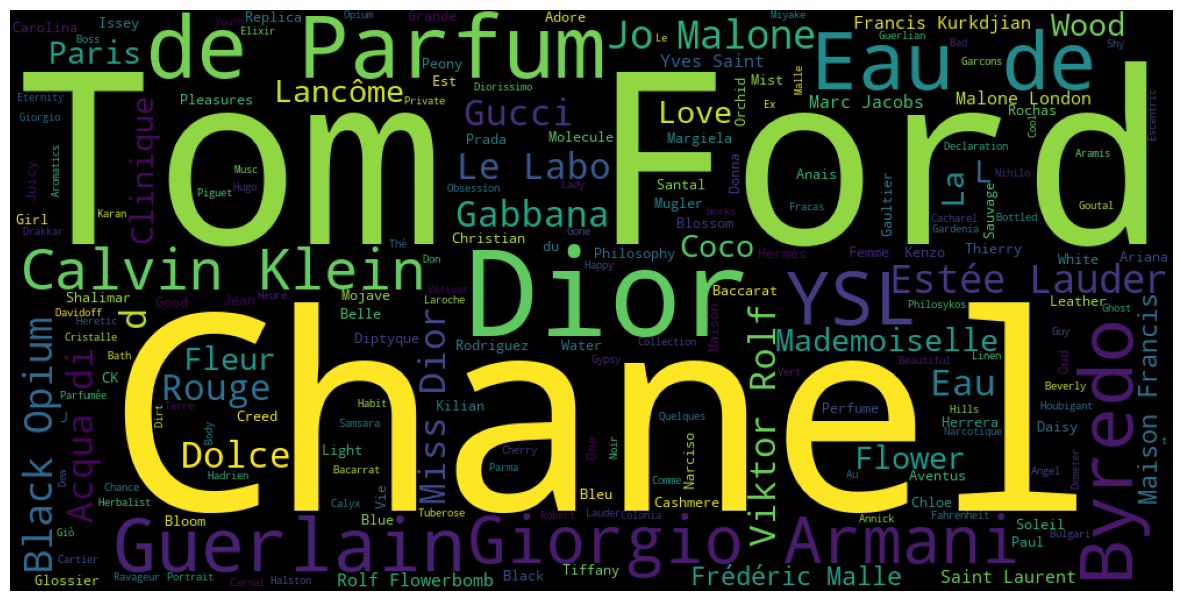

['Chanel', 'Tom Ford', 'Dior', 'de Parfum', 'Eau de', 'Guerlain', 'YSL', 'Byredo', 'Giorgio Armani', 'Calvin Klein']


In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

collated_list = wwd_reccomendations + cosmopolitan_reccomendations + tmh_recommendations + mc_recommendations + luxe_recommendations
unique_string=(" ").join(collated_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()
top_word = list(wordcloud.words_.keys())
print(top_word[:10])

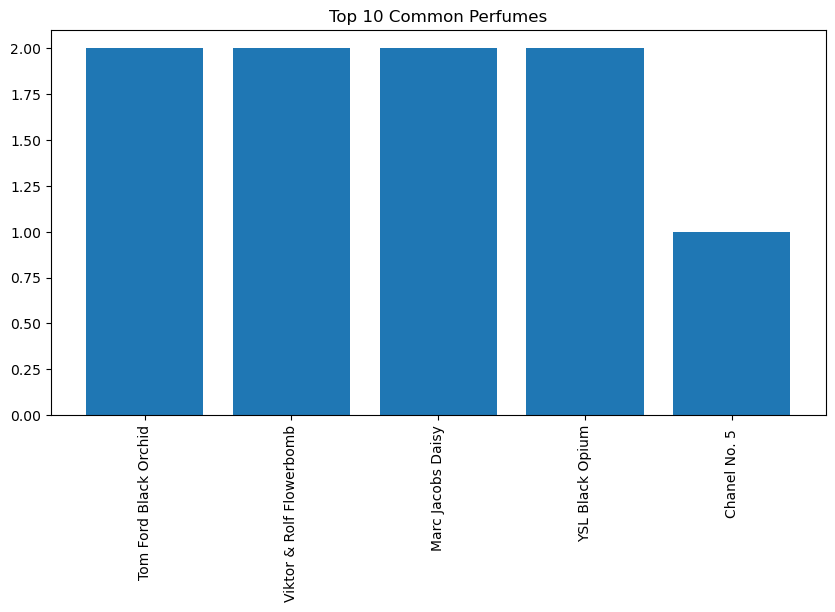

In [18]:
# Importing of relevant libraries
from collections import Counter

# Count the frequency of each element in the list
counter = Counter(collated_df["Perfume Name"])

# Get the most common elements and their frequencies
most_common = counter.most_common()

# Get the top 5 most common elements and their frequencies
top_5 = most_common[:5]

# Extract the labels and values for the chart
labels, values = zip(*top_5)

# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the chart
plt.bar(labels, values)

plt.xticks(range(len(labels)), labels, rotation=90)

# Add a title and show the plot
plt.title("Top 10 Common Perfumes")
plt.show()


# Filtering Top 5 Perfumes

In [19]:
# Return top 5 names
top_names = [name for name, count in top_5]
print(top_names)

['Tom Ford Black Orchid', 'Viktor & Rolf Flowerbomb', 'Marc Jacobs Daisy', 'YSL Black Opium', 'Chanel No. 5 ']


In [20]:
# Send the perfume names and corresponding descriptions into a dataframe 
top_5_df = collated_df[collated_df["Perfume Name"].isin(top_names)]
top_5_df

,Perfume Name,Perfume Description
0,Chanel No. 5,Floral aldehydic
7,Tom Ford Black Orchid,Amber floral
19,Viktor & Rolf Flowerbomb,Floral
88,Marc Jacobs Daisy,Chypre fruity
10,Viktor & Rolf Flowerbomb,If you were a teen in the early aughts like I ...
4,YSL Black Opium,Black Opium is a seductively intoxicating frag...
16,Marc Jacobs Daisy,Whimsical white daisies abloom on its cap give...
1,Tom Ford Black Orchid,Amber Floral
6,YSL Black Opium,Amber Floral Gourmand


In [21]:
# Finding common used perfume names and combining thier descriptions
top_5_df = top_5_df.groupby(["Perfume Name"])["Perfume Description"].apply(lambda x: ", ".join(x)).reset_index()

In [22]:
# Printing the dataframe
top_5_df

,Perfume Name,Perfume Description
0,Chanel No. 5,Floral aldehydic
1,Marc Jacobs Daisy,"Chypre fruity, Whimsical white daisies abloom ..."
2,Tom Ford Black Orchid,"Amber floral, Amber Floral"
3,Viktor & Rolf Flowerbomb,"Floral, If you were a teen in the early aughts..."
4,YSL Black Opium,Black Opium is a seductively intoxicating frag...


# Importing a CSV with 2191 entries of perfume names and description

In [23]:
perfume_df = pd.read_csv('final_perfume_data.csv', encoding = 'unicode_escape')
perfume_df

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...
...,...,...,...,...,...
2186,Perfect Veil Eau de Parfum,Sarah Horowitz Parfums,"This was created to smell like clean, naked s...","top: lemon, bergamot base: musk, vanilla, san...",https://static.luckyscent.com/images/products/...
2187,Scent Eau de Parfum,Costume National,Scent is Costume Nationals debut fragrance. W...,"amber, jasmine tea, mother of pearl hibiscus ...",https://static.luckyscent.com/images/products/...
2188,Bronze Eau de Parfum,Nanadebary,"Bronze is a naughty little vixen of a scent, ...","bergamot, mandarine, cinnamon, jasmine, iris,...",https://static.luckyscent.com/images/products/...
2189,Monyette Paris Fragrance Oil,Monyette Paris,"This isn't just sexy, it's big night out se...","Tahitian gardenia, French muguet du bois, hin...",https://static.luckyscent.com/images/products/...


In [24]:
# Extracting the descriptions column
description = perfume_df["Description"].tolist()
print(description)

[" Rapa Nui for sugar, Tihota is, quite simply, The One. The One that will call to you every moment you're not smelling it, The One that you've only had hints of in other vanilla perfumes, The One that lasts and lasts, The One that has perfectly captured the essence of the pure nature of fresh vanilla beans and has harnessed it beyond your wildest dreams. It inspires obsessive devotion with its fragrance of smooth, vanilla bean pods dipped in honeyed water and left to steep. The result is the pure magic, an unbridled vanilla, sweet, raw and achingly desirable. Of course, Tihota isn't the first perfume to focus on the dark sweetness of vanilla... perfumery is filled with vanillas, but this smells like the dream of a master perfumer who was obsessed with vanilla and was finally given free rein to worship the note with no apologies. It is, without a sliver of a doubt, the finest pure vanilla we've ever had the honor of carrying, and it's so beautiful it pains us to put the bottle down.", 

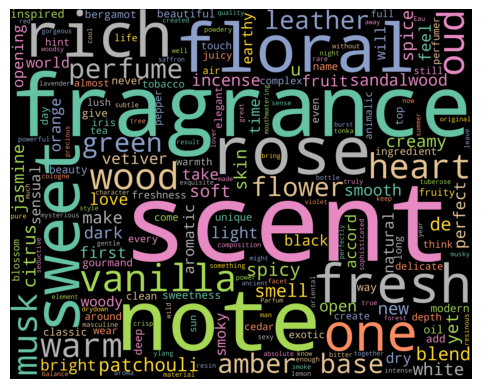

In [25]:
from matplotlib import pyplot

# Scraped text
text = ' '.join(description)

# Generate the wordcloud
wordcloud = WordCloud(width= 5000, 
                      height = 4000, 
                      random_state=1, 
                      background_color='black', 
                      colormap='Set2', 
                      collocations=False).generate(text)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Importing of libraries
# TheFuzz library uses the Levenshtein Distance method, which is string metric to measure difference between two sequences,
# which in this case is used to find distinct strings.
# The output of which is a number between 0 to 100.
from thefuzz import fuzz
from thefuzz import process


C:\Users\Rajee\AppData\Roaming\Python\Python39\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [27]:
#Example test using a hard-coded phrase and the description list extracted from perfume_df
test_array = process.extract("fresh and fruity", description)
print(test_array)
y = []

for i in range(len(test_array)):
    y.append(perfume_df.Name[perfume_df['Description']== test_array[i][0]].values[0])
    
print(y)

[(' Pine tree and incense with nuances of Mandarin orange, pillowy soft musk and sugared sap.', 86), (' A tropical, lush floral with notes of Lily and beautiful nuances of ozone, grass, soft amber and orange blossom.', 86), (" Tom Ford's classic oud scent that started it all, now available in a grey and silver-tone atomizer with magnetic closure.", 86), (' Knize face and body care lotion wth the unique, sought after Knize Ten fragrance. Also suitable to use as an after shave lotion.', 86), (' This scent is a tropical tuberose accorded with a white lily background and sits on a warm amber sandalwood base.', 86)]
['Papelato Eau de Parfum', 'Lili Laa Eau de Parfum', 'Oud Wood Travel Atomizer', 'Knize Ten Face and Body Care Lotion Body / Aftershave ...', 'No.05 Kandilli- Perfume Oil Perfume Oil Roll-On']


In [28]:
perfume_dupes = []
for x in top_5_df['Perfume Description']:
    perfume_dupes.append(process.extract(x, description))

print(perfume_dupes)

[[(' A tropical, lush floral with notes of Lily and beautiful nuances of ozone, grass, soft amber and orange blossom.', 86), (' A tribute to the expanse of space extending from the sky to the flower and fruit laden earth below, Sola, the newest offering from DI SER and perfumer Yasuyuki Shinohara, showcases the natural flora of Hokkaido, Japan with locally sourced and sustainably harvested ingredients from DI SERs own gardens. Starting with aromatic notes of freshly harvested Hokkaido lavender, lemongrass and yuzu, the uplifting scent moves to a floral middle of Japanese rose, magnolia, geranium and jasmine before settling on a spiritual bed of frankincense and myrrh. The spiritual and meditative scent evokes an imagery of a peaceful universe in complete harmony with the bounties of nature and of peace and contentment with its generous offerings.', 57), (' An aromatic ode to the ancient beauty of Japan, Kagiroi represents the changes in the shade of the dawn sky over the mountains of H

In [29]:
print(len(perfume_dupes))
print(len(top_5_df))

5
5


In [30]:
dupe_list = []
for x in perfume_dupes:
    y = []
    for i in range(len(x)):
        y.append(perfume_df.Name[perfume_df['Description']== x[i][0]].values[0])
    dupe_list.append(y)
print(dupe_list)
print(len(perfume_dupes))

[['Lili Laa Eau de Parfum', 'Sola Parfum', 'Kagiroi Parfum', 'A Blvd. Called Sunset Eau de Parfum', 'Freckled and Beautiful Eau de Parfum'], ['Tihota Eau de Parfum', 'Sola Parfum', 'Kagiroi Parfum', 'Velvet Fantasy Eau de Parfum', 'A Blvd. Called Sunset Eau de Parfum'], ['Lili Laa Eau de Parfum', 'Adameku Parfum', 'No.05 Kandilli- Perfume Oil Perfume Oil Roll-On', 'No.02 Le Long Fond - Eau de Parfum', 'French Cancan - Eau de Parfum'], ['Kagiroi Parfum', 'Champs Lunaires Eau de Toilette', 'Puritas Eau de Parfum', 'Interlude Black Iris Eau de Parfum', 'Escale En Haiti Eau De Cologne'], ['Tihota Eau de Parfum', 'Sola Parfum', 'Kagiroi Parfum', 'Velvet Fantasy Eau de Parfum', 'A Blvd. Called Sunset Eau de Parfum']]
5


# Alternatives found for each Top 5 Perfumes

In [31]:
for i in range(len(dupe_list)):
    print(top_5_df['Perfume Name'][i])
    print(dupe_list[i])
    print()

Chanel No. 5 
['Lili Laa Eau de Parfum', 'Sola Parfum', 'Kagiroi Parfum', 'A Blvd. Called Sunset Eau de Parfum', 'Freckled and Beautiful Eau de Parfum']

Marc Jacobs Daisy
['Tihota Eau de Parfum', 'Sola Parfum', 'Kagiroi Parfum', 'Velvet Fantasy Eau de Parfum', 'A Blvd. Called Sunset Eau de Parfum']

Tom Ford Black Orchid
['Lili Laa Eau de Parfum', 'Adameku Parfum', 'No.05 Kandilli- Perfume Oil Perfume Oil Roll-On', 'No.02 Le Long Fond - Eau de Parfum', 'French Cancan - Eau de Parfum']

Viktor & Rolf Flowerbomb
['Kagiroi Parfum', 'Champs Lunaires Eau de Toilette', 'Puritas Eau de Parfum', 'Interlude Black Iris Eau de Parfum', 'Escale En Haiti Eau De Cologne']

YSL Black Opium
['Tihota Eau de Parfum', 'Sola Parfum', 'Kagiroi Parfum', 'Velvet Fantasy Eau de Parfum', 'A Blvd. Called Sunset Eau de Parfum']



In [32]:
with open("hidden_token.txt", "r") as f:
    token = f.readlines()[0]

In [40]:
import numpy
flat_dupes = list(numpy.concatenate(dupe_list).flat)

flat_dupes = list(dict.fromkeys(flat_dupes))

cleaned_dupes = [sub.replace(' and ', ' "and" ') for sub in flat_dupes]
print(cleaned_dupes)

['Lili Laa Eau de Parfum', 'Sola Parfum', 'Kagiroi Parfum', 'A Blvd. Called Sunset Eau de Parfum', 'Freckled "and" Beautiful Eau de Parfum', 'Tihota Eau de Parfum', 'Velvet Fantasy Eau de Parfum', 'Adameku Parfum', 'No.05 Kandilli- Perfume Oil Perfume Oil Roll-On', 'No.02 Le Long Fond - Eau de Parfum', 'French Cancan - Eau de Parfum', 'Champs Lunaires Eau de Toilette', 'Puritas Eau de Parfum', 'Interlude Black Iris Eau de Parfum', 'Escale En Haiti Eau De Cologne']


In [44]:
import tweepy

#Put your Bearer Token in the parenthesis below
client = tweepy.Client(bearer_token=token)


# Get tweets that contain the hashtag #petday
# -is:retweet means I don't wantretweets
# lang:en is asking for the tweets to be in english
tweets = []
for query in cleaned_dupes:
    tweets += tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=100)

for tweet in tweets:
    print(tweet.text)

MONTALE Velvet Fantasy Eau de Parfum, 3.4 fl. oz.
https://t.co/YKZN8pvjm9


The lack of tweets regarding these perfumes prove the lesser known context of these perfumes, and the potential to be accurate recommendations.

# Summary

We discovered through exploratory data analysis that each website has varied rankings in their articles. It is observed that the dataset and scope can be broadened to help develop a better recommendation system. More data could have supplemented this projected, and add a varied perspective to this project. Overall, the insights drawn from this project are speculative, as mentioned in the introduction, perfumes and scents are personal and descriptions vary depending on the user. However, this recommmendation engine hopes to bridge this gap and serve as a foundation for further analysis, while showing how broad the fragrance market is.

# References & Resources

-Beautiful Soup: Build a Web Scraper With Python [Online]   https://realpython.com/beautiful-soup-web-scraper-python/#extract-text-from-html-elements

-Beautiful Soup Documentation [Online] https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find

-How To Extract Data From The Twitter API Using Python [Online]   https://towardsdatascience.com/how-to-extract-data-from-the-twitter-api-using-python-b6fbd7129a33


-Generating Word Cloud in Python [Online]  https://www.geeksforgeeks.org/generating-word-cloud-python/

-Sentiment Analysis: First Steps With Python's NLTK Library  [Online] https://realpython.com/python-nltk-sentiment-analysis/

-Python RegEx [Online]  https://www.w3schools.com/python/python_regex.asp

-Fuzzy String Matching in Python Tutorial [Online]   https://www.datacamp.com/tutorial/fuzzy-string-python

__

-CSV Dataset: https://www.kaggle.com/datasets/nandini1999/perfume-recommendation-dataset